# Email Spam filter

### Abstract

### Dependencies

### DataSet
This project used the Dataset downloaded from "https://archive.ics.uci.edu/ml/datasets/Spambase" which refers to sample Project 3 in MSA project AI & Advanced Analysis (A ML model to identify emails are spam or not - Dataset)

In [1]:
import pandas as pd
import numpy as np

# loading dataset files
dataset = pd.read_csv("dataset/spambase.data", header = None)

In [2]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
dataset.shape

(4601, 58)

In [4]:
# checking for missing values
dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

The output of above cell is all zero, which indicates that the dataset has no missing values and do not need data cleaning.

Next, I am spliting the dataset into train dataset and test dataset. I've set the train test ratio to be 80/20, which is a very commonly used ratio number.

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(dataset.drop(dataset.columns[-1],1), dataset[57], train_size = 0.8, test_size = 0.2, random_state = 4)

Since the index is random after splitting, I need to reset all the indexes.

In [6]:
train_X = train_X.reset_index(drop = True)
train_Y = train_Y.reset_index(drop = True)
test_X = test_X.reset_index(drop = True)
test_Y = test_Y.reset_index(drop = True)

After resetting index, the training and testing set are ready to use for SVM and Naive-Bayes models

In [ ]:
# initialise a dictionary data structure to store all testing result
result = {
    'Model': [],
    'Accuracy': []
}

Training and testing SVM model using three different kernel

In [7]:
from sklearn import svm

# svm model using linear model
svm_linear = svm.SVC(kernel = "linear", gamma = 'auto')
svm_linear.fit(train_X, train_Y)
svm_linear_acc = svm_linear.score(test_X, test_Y)
result['Model'].append("linear")
result["Accuracy"].append(svm_linear_acc)

In [ ]:
# svm model using polynomial kernel
svm_poly = svm.SVC(kernel = "poly")
svm_poly.fit(train_X, train_Y)
svm_poly_acc = svm_poly.score(test_X, test_Y)

result['Model'].append("poly")
result["Accuracy"].append(svm_poly_acc)

In [ ]:
# svm model using sigmodi model
svm_sigmoid = svm.SVC(kernel = "sigmoid")
svm_sigmoid.fit(train_X, train_Y)
svm_sigmoid = svm_sigmoid.score(test_X, test_Y)

result['Model'].append("sigmoid")
result["Accuracy"].append(svm_sigmoid)

Training and testing two different Naive-Bayes model

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive-Bayes model
multi_nb = MultinomialNB().fit(train_X, train_Y)
multi_nb_acc = classifier.score(test_X, test_Y)

result['Model'].append("multinomial")
result["Accuracy"].append(multi_nb_acc)

0.7709011943539631


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive-Bayes model
gaussian_nb = GaussianNB().fit(train_X, train_Y)
gaussian_nb_acc = classifier.score(test_X, test_Y)

result['Model'].append("gaussian")
result["Accuracy"].append(gaussian_nb_acc)


Before training, I need to further preprocess dataset (including normalization and categorization)

Normalization: I need to rescale these three attributes "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total" to be ranged from [1, ...] to [0, 100] (same formate as other attributes)

In [8]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
for i in [54, 55, 56]:
    train_X[i] = 100 * NormalizeData(train_X[i])
    test_X[i] = 100 * NormalizeData(test_X[i])

Categorization: Since I will be using "categorical_crossentropy" loss function in later neural network, I need train_Y and test_Y to be binary matrix representation of the {0, 1}

In [ ]:
from keras.utils import to_categorical
# reformatting outputs to categorical values
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

Checking the data is now what I expected.

In [9]:
print(train_X.head())
print(train_X.describe())

     0     1     2    3     4     5     6     7     8     9     ...      47  \
0  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00    ...     0.0   
1  0.18  0.00  0.18  0.0  1.59  0.36  0.00  0.06  0.06  0.06    ...     0.0   
2  0.17  0.00  0.17  0.0  1.45  0.34  0.05  0.05  0.05  0.05    ...     0.0   
3  0.00  0.18  0.00  0.0  0.18  0.00  0.00  0.37  0.00  0.00    ...     0.0   
4  0.64  0.00  0.64  0.0  1.29  0.00  0.64  0.00  0.00  0.00    ...     0.0   

     48     49   50     51     52   53        54        55        56  
0  0.00  0.000  0.0  0.000  0.000  0.0  0.022696  0.010012  0.056818  
1  0.01  0.052  0.0  0.010  0.169  0.0  0.067907  0.110132  2.796717  
2  0.01  0.051  0.0  0.020  0.163  0.0  0.072265  0.110132  2.897727  
3  0.00  0.244  0.0  0.000  0.000  0.0  0.060191  0.090108  1.054293  
4  0.00  0.104  0.0  0.522  0.313  0.0  0.137177  0.210252  0.707071  

[5 rows x 57 columns]
                0            1            2            3            4   \
co

In [10]:
print(train_Y.head())
print(train_Y.describe())

0    0
1    1
2    1
3    0
4    1
Name: 57, dtype: int64
count    3680.000000
mean        0.395109
std         0.488940
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 57, dtype: float64


In [11]:
print(test_X.head())
print(test_X.describe())

     0    1    2    3     4     5    6    7    8    9     ...      47     48  \
0  0.00  0.0  0.0  0.0  0.00  0.79  0.0  0.0  0.0  0.0    ...     0.0  0.000   
1  0.00  0.8  0.0  0.0  0.00  0.00  0.0  0.0  0.0  1.6    ...     0.0  0.000   
2  0.00  0.0  0.0  0.0  0.81  0.00  0.0  0.0  0.0  0.0    ...     0.0  0.000   
3  0.00  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0    ...     0.0  0.000   
4  0.74  0.0  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0    ...     0.0  0.134   

      49   50     51   52   53        54        55        56  
0  0.147  0.0  0.000  0.0  0.0  0.568922  1.728723  1.759531  
1  0.000  0.0  0.235  0.0  0.0  0.113011  0.199468  0.746468  
2  0.143  0.0  0.143  0.0  0.0  0.016357  0.066489  0.479872  
3  0.000  0.0  3.048  0.0  0.0  0.000000  0.000000  0.186617  
4  0.672  0.0  0.000  0.0  0.0  0.256654  0.265957  1.066382  

[5 rows x 57 columns]
               0           1           2           3           4           5   \
count  921.000000  921.000000  921.00

In [12]:
print(test_Y.head())
print(test_Y.describe())

0    1
1    0
2    0
3    0
4    0
Name: 57, dtype: int64
count    921.000000
mean       0.389794
std        0.487968
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 57, dtype: float64


Constructing layers. This neural network includes 1 input layer(57 Neurons), 2 hidden layers(each with 16 neurons) and 1 output layer(2 neurons).

In [6]:
import tensorflow as tf
import keras

model = keras.models.Sequential()

structure = [57, 16, 16, 2]

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

# Output layer - note that the activation function is softmax
model.add(keras.layers.Dense(units=structure[3], activation = tf.nn.softmax))

Layer structure: [57, 16, 16, 2]


In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# Time to fit the model
print('Starting training')

training_stats = model.fit(train_X, train_Y, batch_size = 4, epochs = 5)

print('Training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%'
      %(training_stats.history['loss'][-1], 100 * training_stats.history['accuracy'][-1]))

Starting training
Epoch 1/5
3680/3680 [==============================] - 1s 243us/step - loss: 0.6962 - accuracy: 0.6038
Epoch 2/5
3680/3680 [==============================] - 1s 221us/step - loss: 0.6545 - accuracy: 0.6049
Epoch 3/5
3680/3680 [==============================] - 1s 214us/step - loss: 0.6524 - accuracy: 0.6049
Epoch 4/5
3680/3680 [==============================] - 1s 212us/step - loss: 0.6518 - accuracy: 0.6049
Epoch 5/5
3680/3680 [==============================] - 1s 222us/step - loss: 0.6501 - accuracy: 0.6049
Training finished
Training Evaluation: loss = 0.650, accuracy = 60.49%


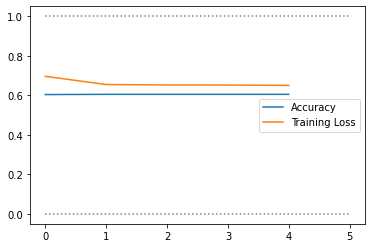

In [8]:
import matplotlib.pyplot as graph
accuracy, = graph.plot(training_stats.history['accuracy'],label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'],label = 'Training Loss')


graph.legend(handles = [accuracy,training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()
graph.savefig("image/neural_network_loss&acc.jpg")

In [9]:
evaluation = model.evaluate(test_X, test_Y, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f%%' %(evaluation[0], 100*evaluation[1]))

Test Set Evaluation: loss = 0.649378, accuracy = 61.02%


In [ ]:
result['Model'].append("Neural Network")
result["Accuracy"].append(evaluation[1])

# convert result from dictionary format to DataFrame formate for later plotting
data = pd.DataFrame.from_dict(result)
data.plot.bar(x = 'Model', y = 'Accuracy', rot = 10)

grapg.show()
graph.savefig("image/accuracy.jpg")